In [1]:
from cropper.Cropper import Cropper
from detector.Detector import Detector
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
%matplotlib inline

In [3]:
img_path = "./cropper/test_img/thuan3.JPG"

Text(0.5, 1.0, 'Raw input')

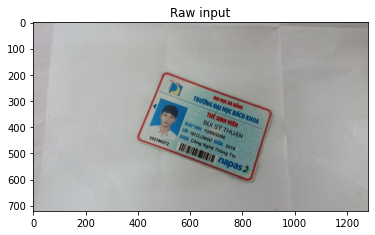

In [12]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Raw input")

Text(0.5, 1.0, 'Aligned Image')

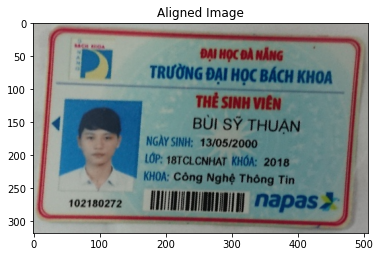

In [13]:
cropper = Cropper()
cropped_img = cropper.predict(img_path, True)
cropped_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
plt.imshow(cropped_img)
plt.title("Aligned Image")

In [6]:
cfg_path = "./detector/config/detector_model.cfg"
weight_path = "./detector/config/yolo-tinyv4-obj_best.weights"

In [7]:
detector = Detector(cfg_path, weight_path)

Time = 1.647386074066162


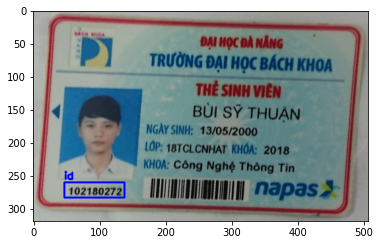

In [11]:
id_only_img, annotated_img = detector.predict(cropped_img)
assert id_only_img is not None
plt.imshow(annotated_img)

Text(0.5, 1.0, 'MSSV')

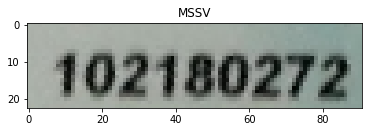

In [14]:
plt.imshow(id_only_img)
plt.title("MSSV")